In [658]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# to be used a prefix for all files
path_prefix = "/content/drive/My Drive/CS210-Project"

Mounted at /content/drive


In [659]:
# Adding some libraries and methods to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import special
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from os.path import join

import warnings
warnings.simplefilter('ignore')

%matplotlib inline



In [660]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [661]:
#  Given Dataset
fname = "Stock Market_Dataset from Hoca2.csv"

df = pd.read_csv(join(path_prefix, fname), encoding = "utf-8")
df.head(10)

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2/2/2024,"2,079",NaN,72.28,NaN,"38,215",NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,"40,300,000,000,000,000",171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,2/1/2024,2-May,161340.0,73.82,577940.0,"38,535",NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10","26,092,000,000,000,000"
2,2,1/31/2024,2-Jan,142860.0,75.85,344490.0,"3,906",NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,1/30/2024,"2,077",139750.0,77.82,347240.0,"3,911",NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,1/29/2024,Feb-49,3590.0,76.78,331930.0,"3,879",NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
5,5,1/26/2024,"2,712",73020.0,78.01,365460.0,"3,852",NaN,"41,811.30",69470.0,...,"5,82,300",10040.0,570.42,12770000.0,159.12,51050000.0,394.14,13160000.0,"2,026.60",410.0
6,6,1/25/2024,"2,571",44980.0,77.36,320180.0,"3,869",NaN,"39,935.70",46300.0,...,"5,76,211",9350.0,562.00,9450000.0,157.75,43310000.0,393.18,15090000.0,"2,027.10",460.0
7,7,1/24/2024,"2,641",65500.0,75.09,323730.0,"3,886",NaN,"40,086.00",58640.0,...,"5,70,977",9560.0,544.87,26350000.0,156.87,47640000.0,390.70,15700000.0,"2,025.40",800.0
8,8,1/23/2024,Feb-45,69160.0,74.37,306060.0,"37,935",NaN,"39,888.80",82670.0,...,"5,64,133",8640.0,492.19,14190000.0,156.02,34930000.0,385.20,15450000.0,"2,035.20",370.0
9,9,1/22/2024,"2,419",121580.0,75.19,28910.0,"37,635",NaN,"39,556.40",85100.0,...,"5,58,316",11600.0,485.71,5210000.0,154.78,43690000.0,381.78,17490000.0,"2,031.50",330.0


In [662]:
# I take Date and Bitcoin_Price from provided data set.

file_path = '/content/drive/My Drive/CS210-Project/Stock Market_Dataset from Hoca2.csv'
data = pd.read_csv(file_path)

# Select the 'Date' and 'Bitcoin_Price' columns
btc_selected_data = data[['Date', 'Bitcoin_Price']]

# Show the first few rows of the selected data
btc_selected_data.head()

,Date,Bitcoin_Price
0,2/2/2024,"43,194.70"
1,2/1/2024,"43,081.40"
2,1/31/2024,"42,580.50"
3,1/30/2024,"42,946.20"
4,1/29/2024,"43,299.80"


In [663]:
# Extract 'Date' and 'Bitcoin_Price' columns
bitcoin_data = data[['Date', 'Bitcoin_Price']].copy()

# Remove commas from 'Bitcoin_Price' and convert to float
bitcoin_data['Bitcoin_Price'] = bitcoin_data['Bitcoin_Price'].replace(',', '', regex=True).astype(float)

# Convert 'Date' to datetime format if not already
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], errors='coerce')

# Set 'Date' as the index
bitcoin_data.set_index('Date', inplace=True)

# Resample data to weekly frequency, using the mean for each week
weekly_bitcoin_data = bitcoin_data.resample('W').mean()

weekly_bitcoin_data = weekly_bitcoin_data.reset_index()

# Display the processed data
weekly_bitcoin_data.head(350)


,Date,Bitcoin_Price
0,2019-02-10,3478.980
1,2019-02-17,3614.520
2,2019-02-24,3947.125
3,2019-03-03,3819.420
4,2019-03-10,3835.420
...,...,...
256,2024-01-07,44023.425
257,2024-01-14,45780.920
258,2024-01-21,42213.725
259,2024-01-28,40255.640


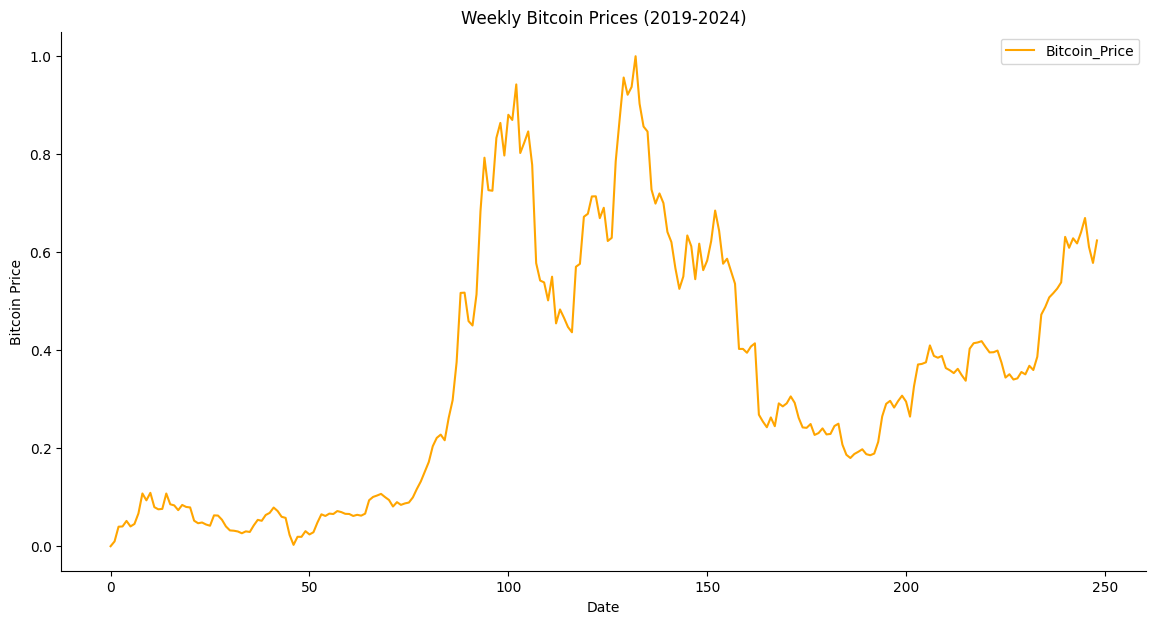

In [664]:
# @title Bitcoin_Price

from matplotlib import pyplot as plt
merged_data['Bitcoin_Price'].plot(kind='line', figsize=(14, 7), color='orange')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Weekly Bitcoin Prices (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

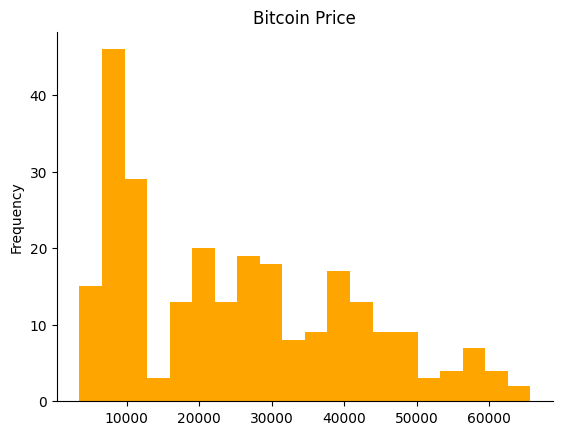

In [665]:
#Histogram of Bitcoin Price

from matplotlib import pyplot as plt
weekly_bitcoin_data['Bitcoin_Price'].plot(kind='hist', bins=20, color="orange", title='Bitcoin Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [666]:
weekly_bitcoin_data.columns

Index(['Date', 'Bitcoin_Price'], dtype='object')

In [557]:
print(weekly_bitcoin_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           261 non-null    datetime64[ns]
 1   Bitcoin_Price  261 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB
None


In [558]:
print(weekly_bitcoin_data.describe())

                      Date  Bitcoin_Price
count                  261     261.000000
mean   2021-08-08 00:00:00   25302.554642
min    2019-02-10 00:00:00    3478.980000
25%    2020-05-10 00:00:00   10028.740000
50%    2021-08-08 00:00:00   23000.180000
75%    2022-11-06 00:00:00   37865.700000
max    2024-02-04 00:00:00   65661.220000
std                    NaN   15984.720965


# Second Data - Google Trends

My second data shows crypto currency interest in google search.

In [667]:
google_data = pd.read_csv('/content/drive/MyDrive/CS210-Project/Google Crypto Currency Interest Dataset.csv')
google_data.head()

,Date,Crypto Currency Interest: (Worldwide)
0,05.05.2019,6
1,12.05.2019,8
2,19.05.2019,7
3,26.05.2019,8
4,02.06.2019,7


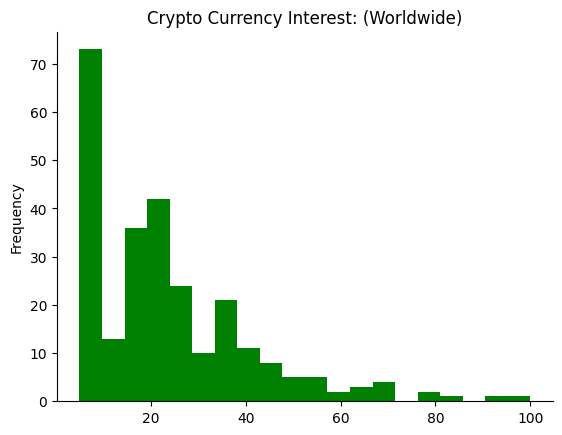

In [668]:
# @title Crypto Currency Interest: (Worldwide)

from matplotlib import pyplot as plt
google_data['Crypto Currency Interest: (Worldwide)'].plot(kind='hist', bins=20, color= "green", title='Crypto Currency Interest: (Worldwide)')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Merge both datasets**

Data Merge process to work on and compare two data more easily. For this process, I found the date range that the two data have in common (05.05.2019 - 04.02.2024). Then, I took the weekly average of the daily bitcoin data based on the dates corresponding to the google_trends data. So, I have two weekly datasets with the same dates.

In [669]:
import pandas as pd

# Load the datasets
google_crypto_interest = pd.read_csv('/content/Google_Crypto Currency Interest Dataset.csv')
stock_market = pd.read_csv('/content/Stock Market Dataset True.csv')

# Clean and reformat the Google Crypto Currency Interest dataset
google_crypto_interest_cleaned = pd.read_csv('/content/Google_Crypto Currency Interest Dataset.csv', delimiter=';')

# Convert the Date columns to datetime format
google_crypto_interest_cleaned['Date'] = pd.to_datetime(google_crypto_interest_cleaned['Date'], dayfirst=True)
stock_market['Date'] = pd.to_datetime(stock_market['Date'], dayfirst=True)

# Select only the Bitcoin_Price and Date columns from the stock market dataset
stock_market_filtered = stock_market[['Date', 'Bitcoin_Price']]

# Convert Bitcoin_Price to numeric by removing commas and converting to float
stock_market_filtered['Bitcoin_Price'] = stock_market_filtered['Bitcoin_Price'].str.replace(',', '').astype(float)

# Aggregate the stock market data to weekly format, aligning to the same start date
stock_market_weekly = stock_market_filtered.resample('W-SUN', on='Date').mean().reset_index()

# Merge the two datasets on the weekly date
merged_data = pd.merge(google_crypto_interest_cleaned, stock_market_weekly, on='Date', how='inner')

# Display the first few rows of the merged dataset
merged_data.head(15)


,Date,Crypto Currency Interest: (Worldwide),Bitcoin_Price
0,2019-05-05,6,5440.120
1,2019-05-12,8,6032.480
2,2019-05-19,7,7839.300
3,2019-05-26,8,7870.700
4,2019-06-02,7,8548.575
5,2019-06-09,7,7871.900
6,2019-06-16,10,8176.800
7,2019-06-23,10,9470.220
8,2019-06-30,8,11923.400
9,2019-07-07,7,11080.875


In [197]:
merged_data.tail()

,Date,Crypto Currency Interest: (Worldwide),Bitcoin_Price
244,2024-01-07,27,44023.425
245,2024-01-14,24,45780.920
246,2024-01-21,22,42213.725
247,2024-01-28,22,40255.640
248,2024-02-04,21,43020.520


In [37]:
merged_data.to_csv("/content/merged.csv")
merged_data.head(150)

,Date,Crypto Currency Interest: (Worldwide),Bitcoin_Price
0,2019-05-05,6,5440.120
1,2019-05-12,8,6032.480
2,2019-05-19,7,7839.300
3,2019-05-26,8,7870.700
4,2019-06-02,7,8548.575
...,...,...,...
145,2022-02-13,45,43634.080
146,2022-02-20,43,42306.240
147,2022-02-27,39,38257.800
148,2022-03-06,38,42625.400


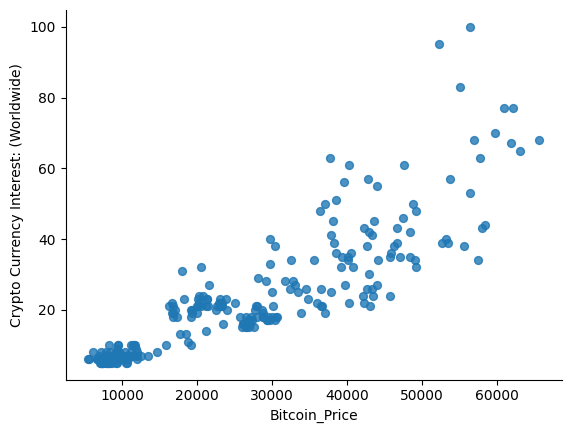

In [562]:
# @title Bitcoin_Price vs Crypto Currency Interest: (Worldwide)

from matplotlib import pyplot as plt
merged_data.plot(kind='scatter', x='Bitcoin_Price', y='Crypto Currency Interest: (Worldwide)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

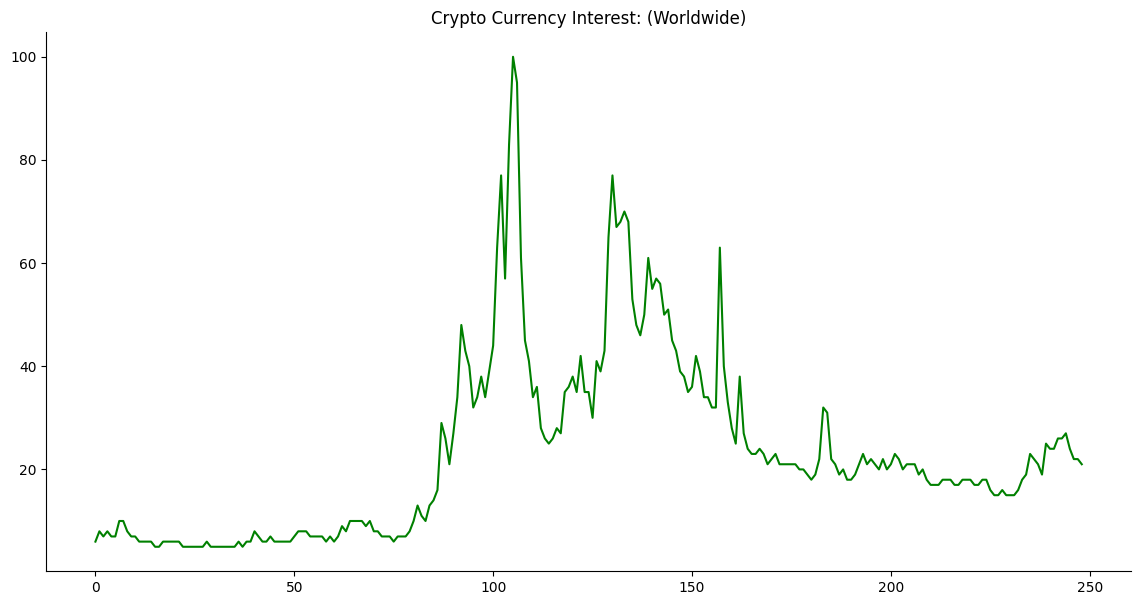

In [563]:
# @title Crypto Currency Interest: (Worldwide)

from matplotlib import pyplot as plt
merged_data['Crypto Currency Interest: (Worldwide)'].plot(kind='line', figsize=(14, 7), color="green", title='Crypto Currency Interest: (Worldwide)')
plt.gca().spines[['top', 'right']].set_visible(False)

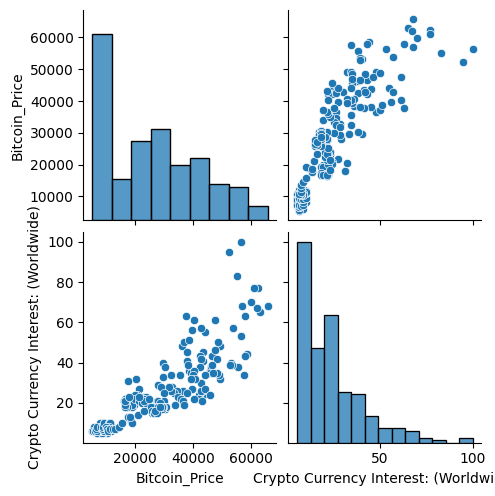

In [200]:
# Let's check if Bitcoin_Price and Crypto Currency Interest are correlated.
cols = ["Bitcoin_Price", "Crypto Currency Interest: (Worldwide)"]
sns.pairplot(data=merged_data, vars=cols)

In [201]:
# Calculation of correlation coefficient and p-value from our recit code

stats.pearsonr(merged_data["Bitcoin_Price"], merged_data["Crypto Currency Interest: (Worldwide)"])

PearsonRResult(statistic=0.8673525120390858, pvalue=8.24448383297185e-77)

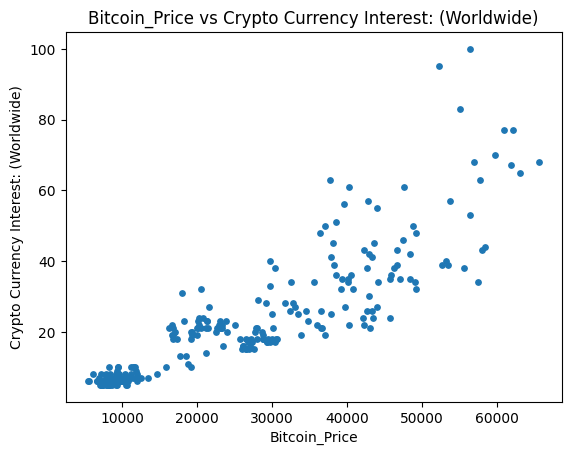

In [202]:
#Scatterplot of Merged Data
merged_data.plot.scatter(x="Bitcoin_Price", y="Crypto Currency Interest: (Worldwide)", s=15)
plt.title("Bitcoin_Price vs Crypto Currency Interest: (Worldwide)")
plt.xlabel("Bitcoin_Price")
plt.ylabel("Crypto Currency Interest: (Worldwide)")
plt.show()

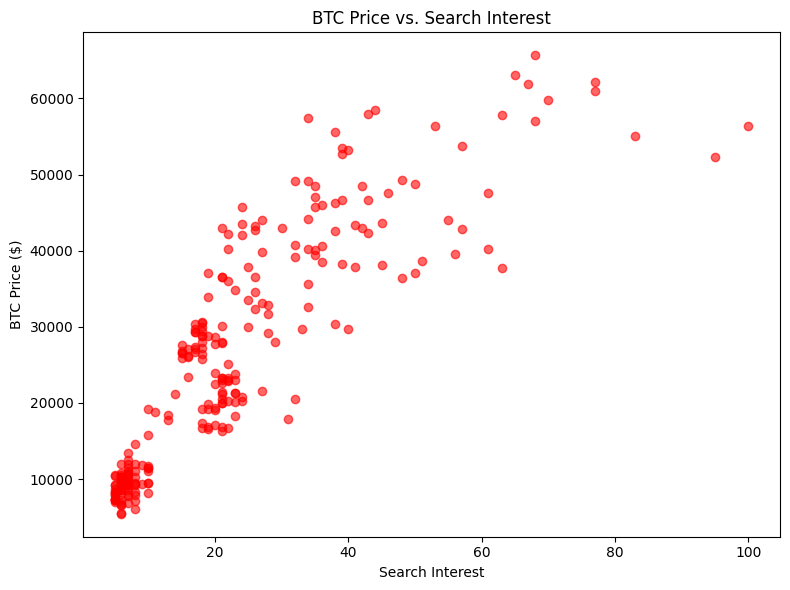

In [203]:
# Prepare data
merged_data = merged_data.reset_index()
btc_prices = merged_data['Bitcoin_Price']
search_interest = merged_data['Crypto Currency Interest: (Worldwide)']
dates = merged_data['Date']
#dates= merged_data[merged_data.columns[0]]

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Scatterplot of Bitcoin prices vs. Search Interest
axs.scatter(search_interest, btc_prices, alpha=0.6, color='red')
axs.set_title('BTC Price vs. Search Interest')
axs.set_xlabel('Search Interest')
axs.set_ylabel('BTC Price ($)')

plt.tight_layout()
plt.show()

To see the relationship between BTC Price and Cryptocurrency Search Interest more easily, plot the two data in one graph

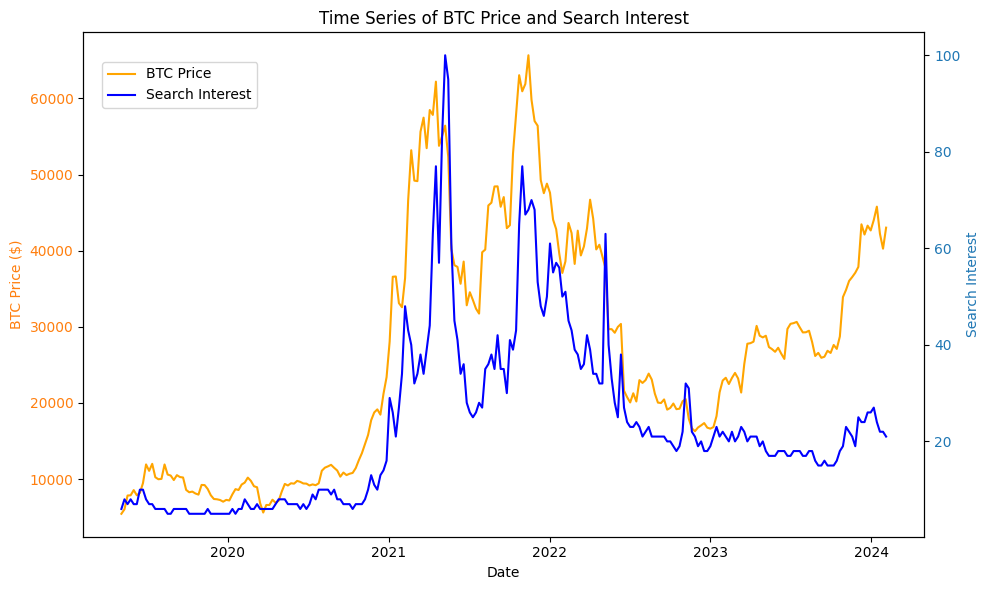

In [394]:
# Set up the figure for the corrected time series plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a plot with BTC Price
color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price ($)', color=color)
ax1.plot(dates, btc_prices, label='BTC Price', color='orange')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Search Interest
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Search Interest', color=color)
ax2.plot(dates, search_interest, label='Search Interest', color='blue')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and a legend to the plot
ax1.set_title('Time Series of BTC Price and Search Interest')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

In [637]:
# extracting the input and output vectors
X = merged_data['Bitcoin_Price'].values.reshape(-1,1)  # converting to column vector
y = merged_data['Crypto Currency Interest: (Worldwide)'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [638]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [639]:
# finding intercept
b = model.intercept_

# finding slope
m = model.coef_

print(m, b, sep="\n")

[0.6236675]
-0.024516263567707752


In [587]:
# Find R^2

def r2(y_true, y_pred):
  u = sum((y_true - y_pred)**2)
  v = sum((y_true - y_true.mean())**2)

  return 1-(u/v)

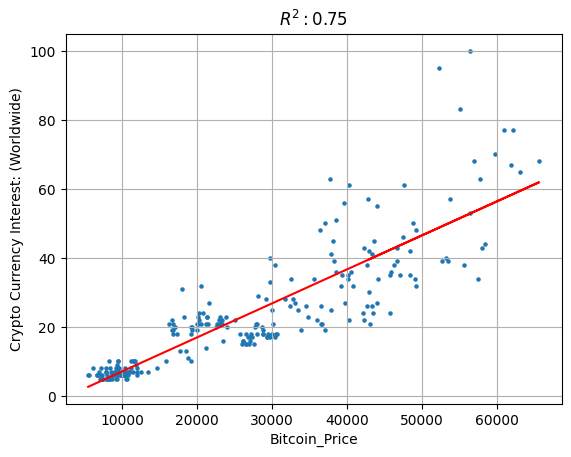

In [588]:
rline = m[0]*X.flatten() + b

merged_data.plot.scatter(x="Bitcoin_Price", y="Crypto Currency Interest: (Worldwide)", s=5)
plt.plot(X.flatten(), rline, c="red")
plt.title(r"$R^2: {:.2f}$".format(r2(y, rline)))
plt.xlabel("Bitcoin_Price")
plt.ylabel("Crypto Currency Interest: (Worldwide)")
plt.grid(True)
plt.show()

In [649]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

x = merged_data[['Bitcoin_Price']]
y = merged_data['Crypto Currency Interest: (Worldwide)']

#create linear regression model
model = LinearRegression()
model.fit(x, y)

#R^2 score
r2_value = r2_score(y, model.predict(x))

#mean Squared Error (MSE)
mse = mean_squared_error(y, model.predict(x))

#error Rate calculated
error_rate = mse / y.var()

#accuracy rate
accuracy_rate = 1 - error_rate

r2_value, mse, error_rate, accuracy_rate

(0.7523003801405128,
 0.008657186740354374,
 0.24670484226969008,
 0.75329515773031)

In [590]:
import statsmodels.api as sm

# Add a constant to the independent variable matrix (required for statsmodels)
X = sm.add_constant(merged_data['Bitcoin_Price'])
Y = merged_data['Crypto Currency Interest: (Worldwide)']

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

In [516]:
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Crypto Currency Interest: (Worldwide)   R-squared:                       0.752
Model:                                               OLS   Adj. R-squared:                  0.751
Method:                                    Least Squares   F-statistic:                     750.2
Date:                                   Wed, 22 May 2024   Prob (F-statistic):           8.24e-77
Time:                                           18:10:25   Log-Likelihood:                 237.98
No. Observations:                                    249   AIC:                            -472.0
Df Residuals:                                        247   BIC:                            -464.9
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

## *STEP-3*

Machine Learning Techniques Outcome

1) kNN Model

1. Load the data
2. Initialise the value of k
3. Calculate the distance between the test data and each row of training data.
4. Sort the calculated distances in ascending order based on distance values
5. Get top k rows from the sorted array
6. Get the most frequent class of these rows
7. Return the predicted class

In [670]:
# Some libraries and methods to use

from sklearn.neighbors import KNeighborsRegressor
from ipywidgets import interact
from sklearn.neighbors import KNeighborsClassifier

In [671]:
# Define features and target variable
A = merged_data[['Bitcoin_Price']]
b = merged_data['Crypto Currency Interest: (Worldwide)']

# Split the data into training, validation, and testing sets
A_train_val, A_test, b_train_val, b_test = train_test_split(A, b, test_size=0.2, random_state=42)
A_train, A_val, b_train, b_val = train_test_split(A_train_val, b_train_val, test_size=0.2, random_state=42)

In [672]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the kNN model
# Create a kNN regressor with k=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(A_train, b_train)

# Predict on the test set
# Predict the target values for the test data (A_test)
knn_predictions = knn.predict(A_test)

# Evaluate the model
# Calculate the Mean Squared Error between the actual target values (b_test) and the predicted values (knn_predictions)
knn_mse = mean_squared_error(b_test, knn_predictions)
print(f'kNN Mean Squared Error: {knn_mse}')

kNN Mean Squared Error: 74.5736


In [673]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from ipywidgets import interact

# Interactive visualization function
def visualize_knn(k):
    # Generate the k-NN regressor model
    model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model
    # Train the k-NN model using the training data (A_train and b_train)
    model.fit(A_train, b_train)

    # Predict on the validation set
    b_pred_val = model.predict(A_val)

    # Calculate MSE and RMSE on validation set
    mse_val = mean_squared_error(b_val, b_pred_val)
    rmse_val = np.sqrt(mse_val)

    # Predict on the test set
    b_pred_test = model.predict(A_test)

    # Calculate MSE and RMSE on test set
    mse_test = mean_squared_error(b_test, b_pred_test)
    rmse_test = np.sqrt(mse_test)

    # Plot actual vs. predicted values for test set
    plt.figure(figsize=(10, 6))
    plt.scatter(b_test, b_pred_test, color='blue', alpha=0.5)
    plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'k-NN (n_neighbors={k}) Predictions\nTest RMSE: {rmse_test:.2f}, Validation RMSE: {rmse_val:.2f}')
    plt.show()

# Use ipywidgets to interactively change the value of k
interact(visualize_knn,k=(1,20))

interactive(children=(IntSlider(value=10, description='k', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.visualize_knn(k)>

In [597]:
#Create an instance of the k-Nearest Neighbors regressor with k=1

knn1 = KNeighborsRegressor(n_neighbors=1)

# Fit the model
knn1.fit(A_train, b_train)

# Predict on the test set
b_pred_1 = knn1.predict(A_test)

# Predict on the validation set
val_b_pred_1 = knn1.predict(A_val)

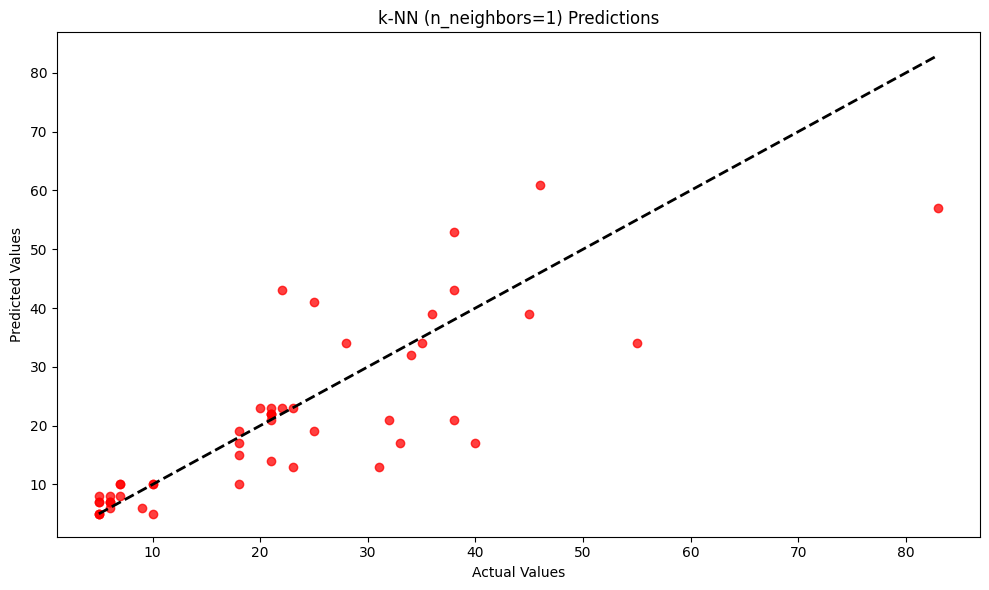

RMSE1: 9.22
Validation RMSE10: 9.77
MSE1: 84.96
Validation MSE10: 95.55


In [598]:
#Visualize k-Nearest Neighbors regressor with k=1

plt.figure(figsize=(10, 6))

#Scatter plot for k-NN with n_neighbors=1

plt.scatter(b_test, b_pred_1, color='red', alpha=0.75)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-NN (n_neighbors=1) Predictions')

rmse1 = np.sqrt(mean_squared_error(b_test, b_pred_1))
mse1 = mean_squared_error(b_test, b_pred_1)

val_rmse1 = np.sqrt(mean_squared_error(b_val, val_b_pred_1))
val_mse1 = mean_squared_error(b_val, val_b_pred_1)

#Display the plots
plt.tight_layout()
plt.show()

#Display the values RMSE with k =1 and MSE
print(f"RMSE1: {rmse1:.2f}")
print(f"Validation RMSE1: {val_rmse1:.2f}")
print(f"MSE1: {mse1:.2f}")
print(f"Validation MSE1: {val_mse1:.2f}")

In [599]:
knn10 = KNeighborsRegressor(n_neighbors = 10)

knn10.fit(A_train, b_train)

b_pred_10 = knn10.predict(A_test)
val_b_pred_10 = knn10.predict(A_val)

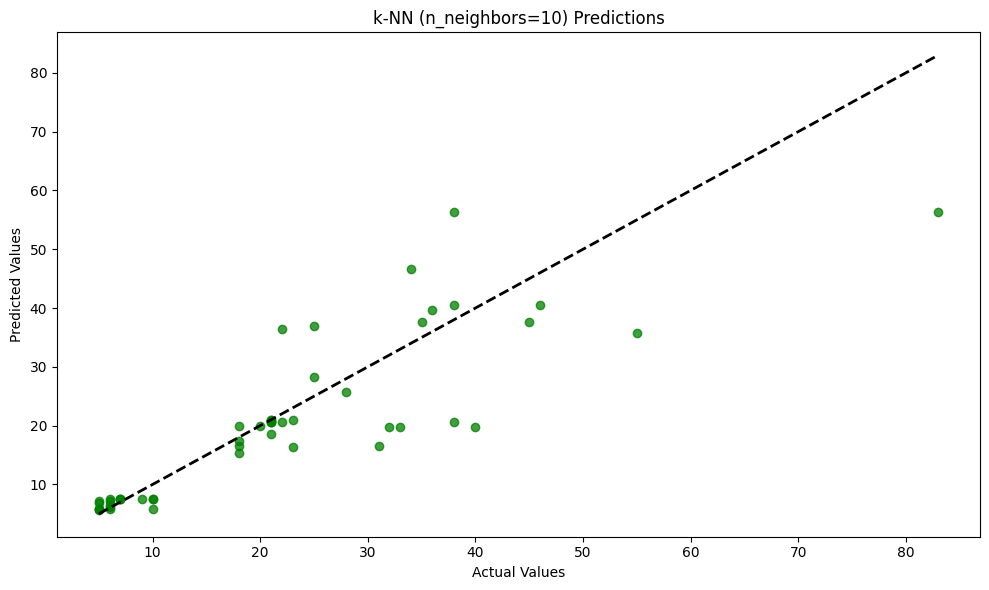

Test RMSE10: 8.25
Validation RMSE10: 6.48
MSE10: 68.14
Validation MSE10: 41.97


In [600]:
plt.figure(figsize=(10, 6))

#Scatter plot for k-NN with n_neighbors=10
#plt.subplot(1, 2, 1)
plt.scatter(b_test, b_pred_10, color='green', alpha=0.75)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-NN (n_neighbors=10) Predictions')
rmse10 = np.sqrt(mean_squared_error(b_test, b_pred_10))
mse10 = mean_squared_error(b_test, b_pred_10)

val_rmse10 = np.sqrt(mean_squared_error(b_val, val_b_pred_10))
val_mse10 = mean_squared_error(b_val, val_b_pred_10)

#Display the plots
plt.tight_layout()
plt.show()

#Display the values RMSE with k =10 and MSE
print(f"Test RMSE10: {rmse10:.2f}")
print(f"Validation RMSE10: {val_rmse10:.2f}")
print(f"MSE10: {mse10:.2f}")
print(f"Validation MSE10: {val_mse10:.2f}")

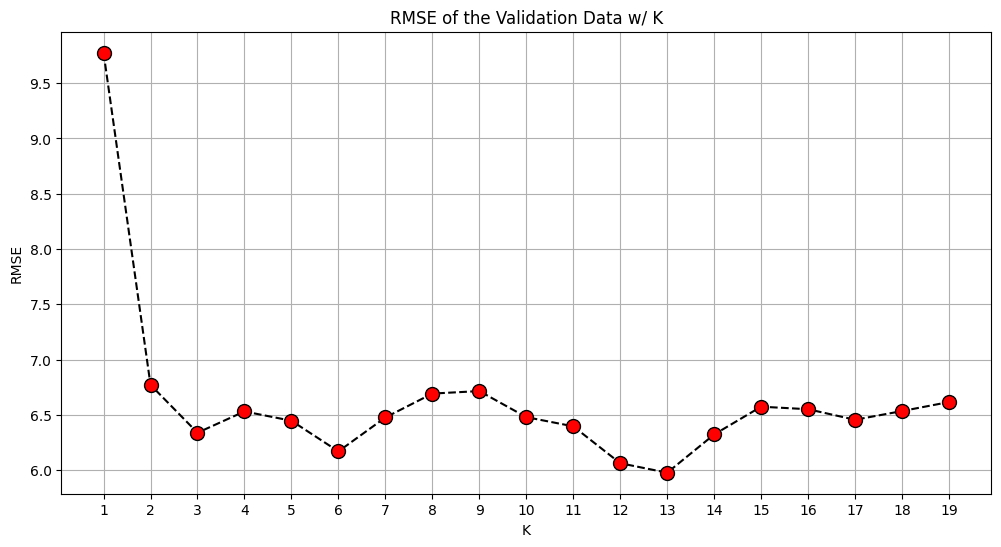

In [601]:
# RMSE calculation for different k values
K_range = np.arange(1, 20)
rmse_list = []

for k in K_range:
    # Create a new model with current K
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")

    # Fit training data
    knn.fit(A_train, b_train)

    # Predict the validation data
    b_pred_val = knn.predict(A_val)

    # Obtain the RMSE value
    rmse = np.sqrt(mean_squared_error(b_val, b_pred_val))
    rmse_list.append(rmse)

plt.figure(figsize=(12, 6))
plt.plot(K_range, rmse_list, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('RMSE of the Validation Data w/ K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.xticks(K_range)
plt.grid()
plt.show()

Find kNN Model Accuracy for k=13

In [602]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Remove commas and convert to float

merged_data['Bitcoin_Price'] = merged_data['Bitcoin_Price'].astype(str).str.replace(',', '').astype(float)


# Normalize the features
# Apply MinMaxScaler to normalize 'Crypto Currency Interest: (Worldwide)' and 'Bitcoin_Price' columns

scaler = MinMaxScaler()
merged_data[['Crypto Currency Interest: (Worldwide)', 'Bitcoin_Price']] = scaler.fit_transform(
    merged_data[['Crypto Currency Interest: (Worldwide)', 'Bitcoin_Price']])

# Convert the target variable into discrete classes
# Apply KBinsDiscretizer to convert 'Bitcoin_Price' into 3 discrete classes

k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
merged_data['Price_Class'] = k_bins.fit_transform(merged_data[['Bitcoin_Price']]).astype(int)


# Define features and target
# Set 'Crypto Currency Interest: (Worldwide)' as the feature (X) and 'Price_Class' as the target (y)

X = merged_data[['Crypto Currency Interest: (Worldwide)']].values
y = merged_data['Price_Class'].values

# Split the data into training and testing sets
# Use train_test_split to split the data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the kNN model
# Create a kNN classifier with k=13

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)   # Train the kNN model using the training data (X_train and y_train)

# Predict and evaluate the model

y_pred = knn.predict(X_test) # Predict the target values for the test data (X_test)

accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model

print(f'kNN Model Accuracy: {accuracy}')


kNN Model Accuracy: 0.78


In [678]:
knn_best = KNeighborsRegressor(n_neighbors=13, metric="euclidean")
knn_best.fit(A_train, b_train)

#Predict the test data
b_pred_best = knn_best.predict(A_test)

#Obtain the RMSE value
rmse = np.sqrt(mean_squared_error(b_test, b_pred_best))
mse = mean_squared_error(b_test, b_pred_best)
print(f"RMSE: {rmse}")
print(f"MSE: {mse:}")

RMSE: 8.520361966920024
MSE: 72.59656804733727


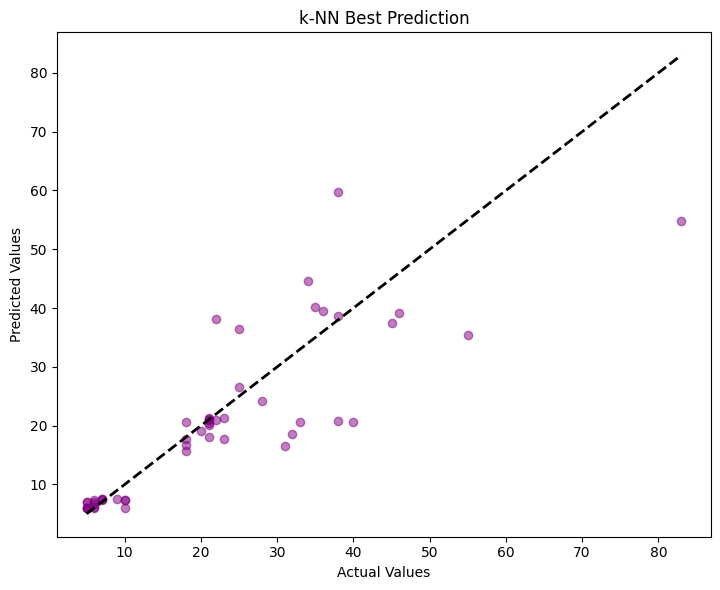

In [608]:
plt.figure(figsize=(14, 6))

#Scatter plot for k-NN with n_neighbors=13
plt.subplot(1, 2, 1)
plt.scatter(b_test, b_pred_best, color='purple', alpha=0.5)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-NN Best Prediction')

#Display the plots
plt.tight_layout()
plt.show()

# **Second ML - Random Forest**

**Random Forest** is *supervised* machine learning algorithms which can be used for both *classification* and *regression* problems.

In [613]:
# Define features and target variable
X = merged_data[['Bitcoin_Price']]
y = merged_data['Crypto Currency Interest: (Worldwide)']

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [458]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Set up kNN with K=12
knn = KNeighborsClassifier(n_neighbors=13, metric="euclidean")
knn.fit(X_train, y_train)  # Fit the model on training data
y_pred_knn = knn.predict(X_test)  # Predict on test data

# Evaluation
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)
print("kNN Model Accuracy:", knn_accuracy)

kNN Model Accuracy: 0.8


In [683]:
from sklearn.ensemble import RandomForestRegressor

rf_model_75 = RandomForestRegressor(n_estimators=75, random_state=42, max_depth=15)
rf_model_75.fit(A_train, b_train)

b_pred_75 = rf_model_75.predict(A_test)

# Evaluate the model
mse = mean_squared_error(b_test, b_pred_75)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 77.44371555555554
Root Mean Squared Error: 8.800211108578903


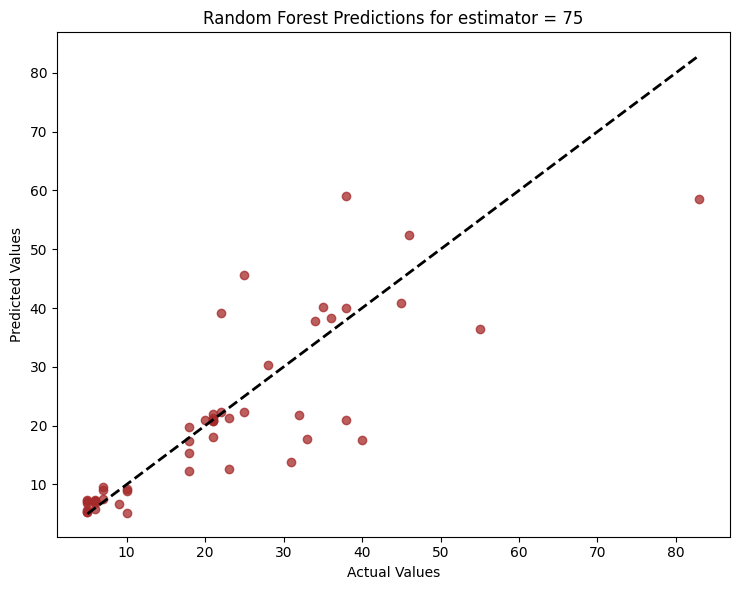

In [684]:
plt.figure(figsize=(7.5, 6))
# Scatter plot for Random Forest Predictions
plt.scatter(b_test, b_pred_75, color='brown', alpha=0.75)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions for estimator = 75')

plt.tight_layout()
plt.show()

In [685]:
rf_model_400 = RandomForestRegressor(n_estimators=400, random_state=42, max_depth=15)
rf_model_400.fit(A_train, b_train)

b_pred_400 = rf_model_400.predict(A_test)

# Evaluate the model
mse = mean_squared_error(b_test, b_pred_400)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 79.0636454453125
Root Mean Squared Error: 8.891774032515249


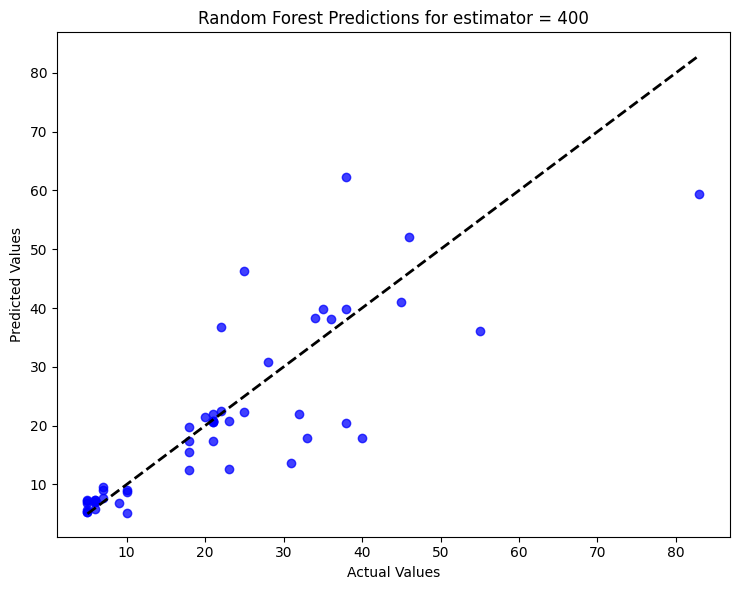

In [686]:
plt.figure(figsize=(7.5, 6))
# Scatter plot for Random Forest Predictions
plt.scatter(b_test, b_pred_400, color='blue', alpha=0.75)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions for estimator = 400')

plt.tight_layout()
plt.show()

In [623]:
rf_model_best = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rf_model_best.fit(A_train, b_train)

b_pred_best = rf_model_best.predict(A_test)

# Evaluate the model
mse = mean_squared_error(b_test, b_pred_best)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 72.52949453885407
Root Mean Squared Error: 8.516424985805608


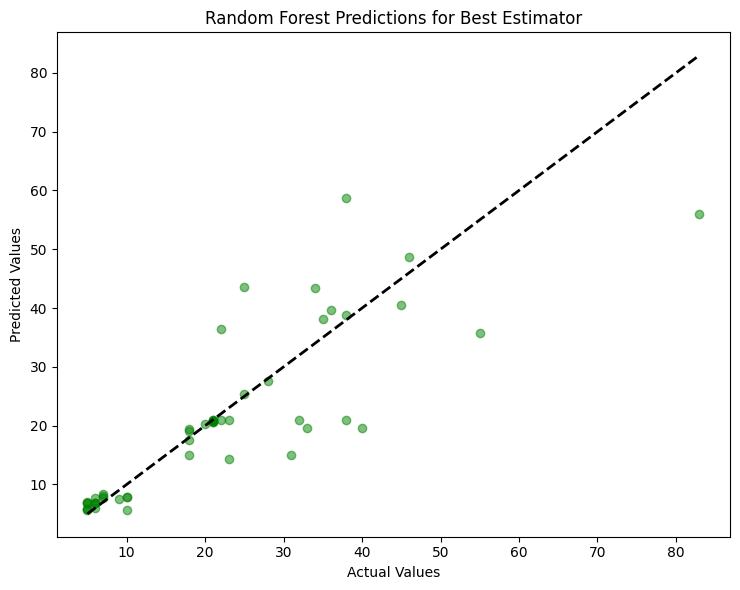

In [625]:
plt.figure(figsize=(7.5, 6))
# Scatter plot for Random Forest Predictions
plt.scatter(b_test, b_pred_best, color='green', alpha=0.5)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions for Best Estimator')

plt.tight_layout()
plt.show()

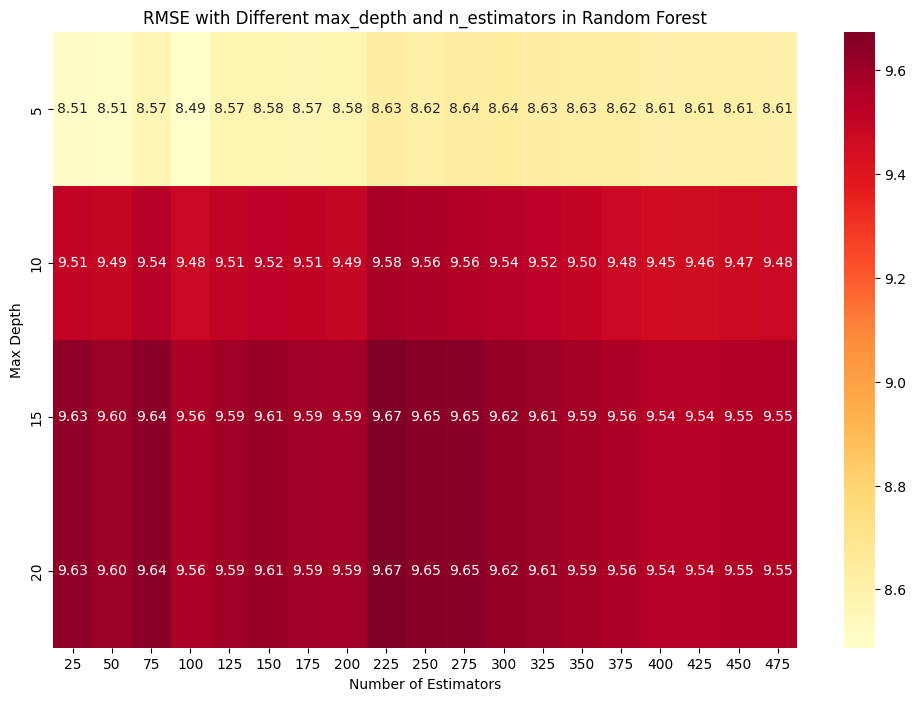

In [674]:
L = merged_data[['Bitcoin_Price']]
i = merged_data['Crypto Currency Interest: (Worldwide)']

# Split the data into training and testing sets
L_train, L_test, i_train, i_test = train_test_split(L, i, test_size=0.2, random_state=42)

# Define the parameter grid for max_depth and n_estimators
max_depth_range = [5, 10, 15, 20]
n_estimators_range = np.arange(25, 500, 25)

# Initialize the results dictionary
results = {'max_depth': [], 'n_estimators': [], 'rmse': []}

# Perform grid search
for max_depth in max_depth_range:
    for n_estimators in n_estimators_range:
        # Initialize the Random Forest Regressor
        rf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42)

        # Train the model
        rf.fit(L_train, i_train)

        # Predict on the test set
        i_pred = rf.predict(L_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(i_test, i_pred))

        # Store the results
        results['max_depth'].append(max_depth)
        results['n_estimators'].append(n_estimators)
        results['rmse'].append(rmse)

results_df = pd.DataFrame(results)

# Pivot the results DataFrame for heatmap plotting
results_pivot = results_df.pivot(index='max_depth', columns='n_estimators', values='rmse')


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(results_pivot, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title('RMSE with Different max_depth and n_estimators in Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()